In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = '-'
os.environ['KAGGLE_KEY'] = '-'

In [ ]:
!kaggle datasets download -d mathurinache/simpsons-images

 98% 391M/400M [00:03<00:00, 167MB/s]
100% 400M/400M [00:03<00:00, 132MB/s]


In [ ]:
!unzip 'simpsons-images.zip' -d /content/simpsons

In [ ]:
os.listdir('/content/simpsons/train')

['moe_szyslak',
 'kent_brockman',
 'comic_book_guy',
 'edna_krabappel',
 'apu_nahasapeemapetilon',
 'charles_montgomery_burns',
 'principal_skinner',
 'ned_flanders',
 'homer_simpson',
 'lenny_leonard',
 'chief_wiggum',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'sideshow_bob',
 'nelson_muntz',
 'milhouse_van_houten',
 'abraham_grampa_simpson',
 'krusty_the_clown']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/content/simpsons/train')
test_dir = os.path.join('/content/simpsons/test')

 
datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    seed=123,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode = 'rgb',
    shuffle=True)
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    seed=123,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
    color_mode = 'rgb')

Found 12411 images belonging to 19 classes.
Found 3091 images belonging to 19 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(19, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi dan validasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=50,verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
388/388 - 1516s - loss: 2.2671 - accuracy: 0.3125 - val_loss: 2.0983 - val_accuracy: 0.3934
Epoch 2/50
388/388 - 1518s - loss: 1.5740 - accuracy: 0.5270 - val_loss: 1.6654 - val_accuracy: 0.5102
Epoch 3/50
388/388 - 1511s - loss: 1.2153 - accuracy: 0.6306 - val_loss: 1.4766 - val_accuracy: 0.5865
Epoch 4/50
388/388 - 1508s - loss: 0.9599 - accuracy: 0.7058 - val_loss: 1.2707 - val_accuracy: 0.6182
Epoch 5/50
388/388 - 1546s - loss: 0.7781 - accuracy: 0.7573 - val_loss: 1.2748 - val_accuracy: 0.6364
Epoch 6/50
388/388 - 1512s - loss: 0.6280 - accuracy: 0.8089 - val_loss: 1.2334 - val_accuracy: 0.6428
Epoch 7/50
388/388 - 1516s - loss: 0.5346 - accuracy: 0.8324 - val_loss: 1.2270 - val_accuracy: 0.6487
Epoch 8/50
388/388 - 1507s - loss: 0.4406 - accuracy: 0.8617 - val_loss: 1.2803 - val_accuracy: 0.6428
Epoch 9/50
388/388 - 1508s - loss: 0.3922 - accuracy: 0.8766 - val_loss: 1.2434 - val_accuracy: 0.6577
Epoch 10/50
388/388 - 1516s - loss: 0.3390 - accuracy: 0.8946 - val_loss:

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpzompcc_e/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

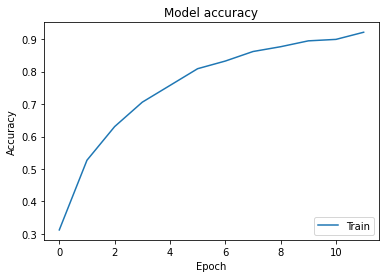

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

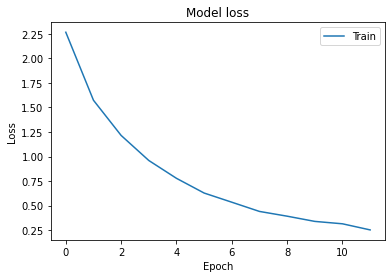

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()